#Error correction by LLMs: aggregation algorythms

In [8]:
import pandas as pd
import re
import networkx as nx
import nltk
import spacy


from collections import defaultdict
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

##Обработка исправлений, полученных от разных LLM:

Исправления, полученные от моделей представлены в виде csv файла, где название каждого столбца -- используемая модель и ее версия:

In [9]:
df_122 = pd.read_csv("lex_122.csv")[:123]
df_122 = df_122.drop(columns=["YandexGPT", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"])
df_122

,Предложения,DeepSeek-V3,GPT-3.5,LLama-3.3,Google Gemini-1.5
0,"В каком-то смысле реклама отражает время, то е...",В каком-то смысле реклама отражает время: суще...,"В каком-то смысле реклама отражает время, то е...","В каком-то смысле реклама отражает время, то е...","В каком-то смысле реклама отражает время, то е..."
1,"Кочегар – пероидически положит уголь в камин, ...",Кочегар периодически подкладывает уголь в топк...,"Кочегар периодически кладёт уголь в камин, нап...","Кочегар – периодически положит уголь в камин, ...",Кочегар периодически подкладывает уголь в ками...
2,"Вода нам очень важна, потому что все организмы...","Вода очень важна, потому что все организмы на ...","Вода нам очень важна, потому что все организмы...","Вода нам очень важна, потому что все организмы...","Вода нам очень важна, потому что все организмы..."
3,Татаро-монгольское нашествие было насильственн...,Татаро-монгольское нашествие было насильственн...,Татаро-монгольское нашествие было насильственн...,Татаро-монгольское нашествие было насильственн...,Татаро-монгольское нашествие было насильственн...
4,"Вопрос о том, что сложно обинять общество в де...","Вопрос о том, как сложно объяснить общество че...","Вопрос о том, что сложно обвинять общество в д...","Вопрос о том, что сложно объединить общество в...","Вопрос о том, что сложно обвинять общество в д..."
...,...,...,...,...,...
118,"Мне само интересно калька, то есть слова или ф...","Мне самому интересна калька, то есть слова или...","Мне интересно узнать о кальках, то есть словах...","Мне самой интересна калька, то есть слова или ...","Мне самой интересна калька, то есть слова или ..."
119,"Хотя русские яблоки маленькие, с первого куска...","Хотя русские яблоки маленькие, с первого кусоч...","Хотя русские яблоки маленькие, с первого куска...","Хотя русские яблоки маленькие, с первого куска...","Хотя русские яблоки маленькие, с первого куска..."
120,"Кочегар – это пожарник – то, кто тушит пожары.","Кочегар – это не пожарник, а тот, кто работает...","Кочегар — это не пожарник, а тот, кто топит печи.","Кочегар - это не пожарник, это тот, кто топит ...","Кочегар – это тот, кто поддерживает огонь в пе..."
121,"Я считаю, что для каждго человека существует н...","Я считаю, что для каждого человека существует ...","Я считаю, что для каждого человека существует ...","Я считаю, что для каждого человека существует ...","Я считаю, что для каждого человека существует ..."


In [10]:
df_33 = pd.read_csv("lex_33.csv")
df_33 = df_33.drop(columns=["Unnamed: 4", "Qwen2.5", "t5-trivia", "Falcon3 3B Instruct"]).reindex(columns=['Предложения', 'DeepSeek-V3', 'GPT-3.5', 'Llama-3.3'])
df_33

,Предложения,DeepSeek-V3,GPT-3.5,Llama-3.3
0,Я хочу научиться играть на фортопиане.,Я хочу научиться играть на фортепиано.,Я хочу научиться играть на фортепиано.,Я хочу научиться играть на фортепиано.
1,"Без лидеров в мире было бы беспорядок, потому ...","Без лидеров в мире был бы беспорядок, потому ч...","Без лидеров в мире был бы беспорядок, потому ч...","Без лидеров в мире был бы беспорядок, потому ч..."
2,Некоторые из кафедр считаются межфакультетными.,Некоторые из кафедр считаются межфакультетными.,Некоторые кафедры считаются межфакультетскими.,Некоторые из кафедр считаются межфакультетскими.
3,Фонтан безконечно работает и вода постоянно сл...,"Фонтан бесконечно работает, и воду постоянно с...","Фонтан бесконечно работает, и вода постоянно с...","Фонтан работает безконечно, и вода постоянно с..."
4,Стая пираний в три счёта может слопать здорове...,Стая пираний в три счёта может слопать здорове...,Стая пираний в три счёта может сожрать здорове...,Стая пираний за три счёта может слопать здоров...
5,Ходя из одного зала Исторического музея в друг...,Переходя из одного зала Исторического музея в ...,Переходя из одного зала Исторического музея в ...,Ходя из одного зала Исторического музея в друг...
6,"Прийдя домой, он устроил представление, которо...","Придя домой, он устроил представление, которое...","Придя домой, он устроил представление, которое...","Прийдя домой, он устроил такое представление, ..."
7,Это очень дещовый материал.,Это очень дешёвый материал.,Это очень дешёвый материал.,Это очень дешёвый материал.
8,"Я не знаю, как я могу жить без её.","Я не знаю, как я могу жить без неё.","Я не знаю, как я могу жить без неё.","Я не знаю, как я могу жить без неё."
9,В сентябре этого года я и мои однокурницы посе...,В сентябре этого года я и мои однокурсницы пос...,В сентябре этого года я и мои однокурсницы по...,В сентябре этого года я и мои однокурсницы пос...


##Измерение перплексии оригинальных исправлений


In [2]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer

def calculate_perplexity(model, tokenizer, text):
    inputs = tokenizer.encode(text, return_tensors="pt", truncation=True, max_length=512)
    
    with torch.no_grad():
        outputs = model(input_ids=inputs, labels=inputs)
        loss = outputs.loss
        perplexity = torch.exp(loss)
    
    return perplexity.item()

model_name = "sberbank-ai/ruT5-large"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)
model.eval()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (d

In [5]:
calculate_perplexity(model, tokenizer, "Я начала ходить в детский сад в четыре года")

27.07470703125

In [ ]:
perps1 = {}
for i in df_122.keys():
    perps = []
    for sent in df_122[i]:
        perplexity = calculate_perplexity(model, tokenizer, sent)
        perps.append(perplexity)
    mean_perplexity = sum(perps) / len(perps)
    perps1[i] = mean_perplexity
perps1


В каком-то смысле реклама отражает время, то есть существует спрос, и определенные товары выполняют его.
11.852363586425781
Кочегар – пероидически положит уголь в камин, на пример, в старом поезде, чтобы огонь не кончился.
7.372673034667969
Вода нам очень важна, потому что все организмы на свете зависят от воды для существования.
45.19324493408203
Татаро-монгольское нашествие было насильственным действием против славян, а иго было стабилизации татарского правила в течение времени.
18.68533706665039
Вопрос о том, что сложно обинять общество в действе отдельного человека, один из самых трудных решить.
14.44717788696289
Мы с Name решили сделать Кэптоун проект, который заключается и во творческой способности, и в информации о Нижнем Новгороде.
17.576454162597656
Я думаю, что у каждого человека есть свобода выбора, но общество оказывает очень большое внешние на выбор каждого человека.
14.153060913085938
Первая революция началась 9 Января 1905 в Санкт-Петербурге, когда люди направились царю 

{'Предложения ': 19.66914284713869,
 'DeepSeek-V3': 16.737239349179152,
 'GPT-3.5': 16.83468256927118,
 'LLama-3.3': 17.570212244018308,
 'Google Gemini-1.5': 16.870527472922472}

In [23]:
perps2 = {}
for i in df_33.keys():
    perps = []
    for sent in df_33[i]:
        perplexity = calculate_perplexity(model, tokenizer, sent)
        perps.append(perplexity)
        print(sent, perplexity)
    mean_perplexity = sum(perps) / len(perps)
    perps2[i] = mean_perplexity

Я хочу научиться играть на фортопиане. 17.66581916809082
Без лидеров в мире было бы беспорядок, потому что человек не может жить без правилов. 18.3929386138916
Некоторые из кафедр считаются межфакультетными. 54.33196258544922
Фонтан безконечно работает и вода постоянно слышно. 88.77021026611328
Стая пираний в три счёта может слопать здоровенного быка. 5.432076454162598
Ходя из одного зала Исторического музея в другой, ты совершаешь путешествие во времени. 16.124616622924805
Прийдя домой, он устроил представление, которое я не забуду до конца жизни. 12.963788986206055
Это очень дещовый материал. 842.690673828125
Я не знаю, как я могу жить без её. 26.44670295715332
В сентябре этого года я и мои однокурницы посетили музей. 32.48761749267578
Во третых, нам надо действовать. 41.74263381958008
С помощью танков из СССР республиканцы отразили два атака на Мадрид в начале войны. 25.013391494750977
Главная причина загрязнения — транспортация нефтепродуктов по реке. 23.461929321289062
Учители в с

In [19]:
perps2

{'Предложения': 98.75669855059999,
 'DeepSeek-V3': 55.380393129406556,
 'GPT-3.5': 45.10963385032885,
 'Llama-3.3': 41.820633642601244}

##Оценка лингвистической приемлемости(когерентности) на основе RuCoLa

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("RussianNLP/ruRoBERTa-large-rucola")
model = AutoModelForSequenceClassification.from_pretrained("RussianNLP/ruRoBERTa-large-rucola")

In [7]:
def check_acceptability(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits

    probabilities = torch.softmax(logits, dim=1)

    acceptability_score = probabilities[0][1].item()

    return acceptability_score

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
import numpy as np

# Установка устройства (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Загрузка модели и токенизатора
model_name = "RussianNLP/ruRoBERTa-large-rucola"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
model.eval()

def calculate_coherence_score(sentence):
    inputs = tokenizer(
        sentence,
        return_tensors="pt",
        truncation=True,
        max_length=512,
        padding=True
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        pred = torch.argmax(logits, dim=1).item()  # 0 или 1

    return pred

def column_to_avg_coherence(df, column_name):
    sentences = df[column_name].dropna().tolist()
    coherence_scores = []

    for sent in tqdm(sentences, desc=f"Анализ {column_name}"):
        if isinstance(sent, str):
            score = calculate_coherence_score(sent)
            if not np.isnan(score):
                coherence_scores.append(score)

    return np.mean(coherence_scores) if coherence_scores else float('nan')



In [9]:
def calculate_coherence_score(sentence):
        inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512, padding=True).to(device)
        with torch.no_grad():
            logits = model(**inputs).logits
            prob = torch.softmax(logits, dim=1)[0][1].item() 
        return prob

def analyze_column(df, column_name):
    sentences = df[column_name].dropna().tolist()
    scores = []
    
    for sent in tqdm(sentences, desc=f"Анализ {column_name}"):
        if isinstance(sent, str):
            score = calculate_coherence_score(sent)
            if not np.isnan(score):
                scores.append(score)
    
    if not scores:
        return {"mean": float('nan'), "variance": float('nan')}
    
    mean = np.mean(scores)
    variance = np.var(scores, ddof=0) 
    return {"mean": mean, "variance": variance}


In [10]:
results = {}
for column in df_122.keys():
    avg_coherence = column_to_avg_coherence(df_122[1:123], column)
    results[column] = avg_coherence
    print(f"Средняя когерентность для {column}: {avg_coherence:.4f}")

# Сохраняем результаты в DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Средняя когерентность'])
print("\nИтоговые результаты:")
print(results_df)

Анализ Предложения : 100%|██████████| 122/122 [00:01<00:00, 66.94it/s]


Средняя когерентность для Предложения : 0.3576


Анализ DeepSeek-V3: 100%|██████████| 122/122 [00:01<00:00, 85.51it/s]


Средняя когерентность для DeepSeek-V3: 0.7851


Анализ GPT-3.5: 100%|██████████| 122/122 [00:01<00:00, 86.17it/s]


Средняя когерентность для GPT-3.5: 0.7067


Анализ LLama-3.3: 100%|██████████| 122/122 [00:01<00:00, 83.03it/s]


Средняя когерентность для LLama-3.3: 0.6043


Анализ Google Gemini-1.5: 100%|██████████| 122/122 [00:01<00:00, 85.28it/s]

Средняя когерентность для Google Gemini-1.5: 0.7008

Итоговые результаты:
                   Средняя когерентность
Предложения                     0.357621
DeepSeek-V3                     0.785063
GPT-3.5                         0.706691
LLama-3.3                       0.604342
Google Gemini-1.5               0.700843


In [11]:
results = {}
for column in df_33.keys():
    avg_coherence = column_to_avg_coherence(df_33, column)
    results[column] = avg_coherence
    print(f"Средняя когерентность для {column}: {avg_coherence:.4f}")

# Сохраняем результаты в DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Средняя когерентность'])
print("\nИтоговые результаты:")
print(results_df)

Анализ Предложения: 100%|██████████| 33/33 [00:00<00:00, 65.21it/s]


Средняя когерентность для Предложения: 0.3344


Анализ DeepSeek-V3: 100%|██████████| 33/33 [00:00<00:00, 82.55it/s]


Средняя когерентность для DeepSeek-V3: 0.8745


Анализ GPT-3.5: 100%|██████████| 33/33 [00:00<00:00, 85.70it/s]


Средняя когерентность для GPT-3.5: 0.8629


Анализ Llama-3.3: 100%|██████████| 33/33 [00:00<00:00, 85.45it/s]

Средняя когерентность для Llama-3.3: 0.8123

Итоговые результаты:
             Средняя когерентность
Предложения               0.334398
DeepSeek-V3               0.874484
GPT-3.5                   0.862941
Llama-3.3                 0.812336


Анализ LLama-3.3: 100%|██████████| 122/122 [00:01<00:00, 88.25it/s]


              Средняя когерентность (набор 1)  Дисперсия
Предложения                          0.357621   0.167458
DeepSeek-V3                          0.785063   0.108049
GPT-3.5                              0.706691   0.131233
LLama-3.3                            0.604342   0.165357


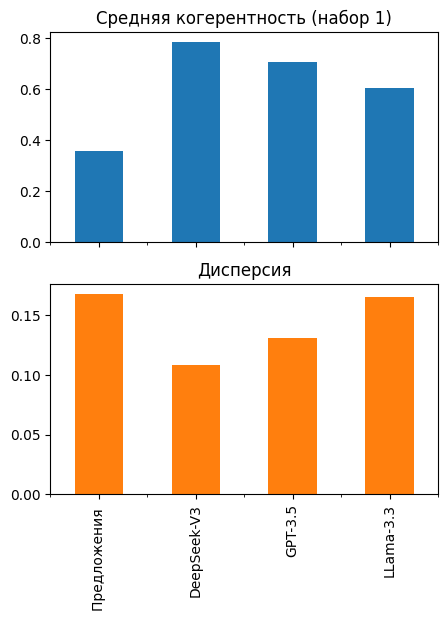

In [12]:
results = {}
for col in df_122.drop(columns=['Google Gemini-1.5']).keys():
    stats = analyze_column(df_122[1:123], col)
    results[col] = {
        "Средняя когерентность (набор 1)": stats["mean"],
        "Дисперсия": stats["variance"],
    }

results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

import matplotlib.pyplot as plt
results_df[["Средняя когерентность (набор 1)", "Дисперсия"]].plot(kind='bar', subplots=True, figsize=(5, 6), legend=False)
plt.show()

Анализ Llama-3.3: 100%|██████████| 33/33 [00:00<00:00, 86.55it/s]


             Средняя когерентность (набор 2)  Дисперсия
Предложения                         0.334398   0.190547
DeepSeek-V3                         0.874484   0.077679
GPT-3.5                             0.862941   0.087591
Llama-3.3                           0.812336   0.117798


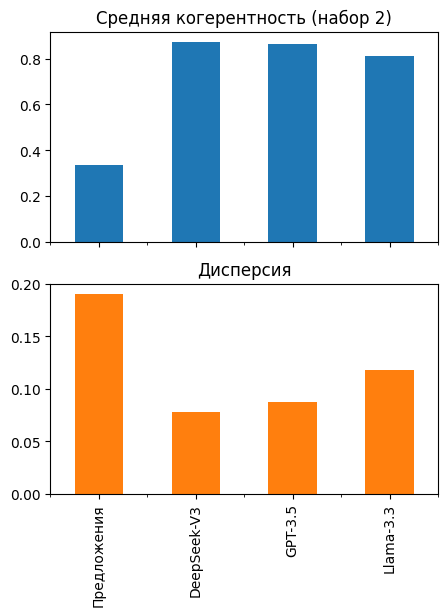

In [13]:
results = {}
for col in df_33.keys():
    stats = analyze_column(df_33, col)
    results[col] = {
        "Средняя когерентность (набор 2)": stats["mean"],
        "Дисперсия": stats["variance"],
    }

results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

import matplotlib.pyplot as plt
results_df[["Средняя когерентность (набор 2)", "Дисперсия"]].plot(kind='bar', subplots=True, figsize=(5, 6), legend=False)
plt.show()

Семантическая близость на основе косинусной близости 

In [ ]:
nlp = spacy.load("ru_core_news_lg")

def semantic_similarity(sent1, sent2):
    s1 = nlp(sent1)
    s2 = nlp(sent2)
    sim = round(s1.similarity(s2), 6)
    #print(f"Семантическое сходство: {sim:.4f}")
    return sim



In [54]:
simsem2 = {}
for i in range(1, 4):
    listsim = []
    for index, row in df_33.iterrows():
        s1 = str(row[df_33.keys()[0]])
        s2 = str(row[df_33.keys()[i]]) 
        listsim.append([s1, s2, semantic_similarity(s1, s2)])
    simsem2[df_33.keys()[i]] = sorted(listsim, key=lambda x: x[2])
simsem2

{'DeepSeek-V3': [['Характер я получила из папй.',
   'Характер я получила от папы.',
   0.768674],
  ['Все жизне приходится с опыт.', 'Вся жизнь приходится с опытом.', 0.8646],
  ['Это очень дещовый материал.', 'Это очень дешёвый материал.', 0.869365],
  ['Учители в среднее школе жалеутся, что учить некого.',
   'Учителя в средней школе жалуются,что учить некого.',
   0.893083],
  ['Когда они начинают быть старшее, они приносят цветы.',
   'Когда они становятся старше, они приносят цветы.',
   0.902214],
  ['Часто путешествовая по пересеченной местности, они пешком приходят большое расстояние.',
   'Часто путешествуя по пересеченной местности, они пешком проходят большие расстояния.',
   0.903417],
  ['Фонтан безконечно работает и вода постоянно слышно.',
   'Фонтан бесконечно работает, и воду постоянно слышно.',
   0.914459],
  ['Крапиву с рисом обычно подают с сметаном.',
   'Крапиву с рисом обычно подают со сметаной.',
   0.925024],
  ['Мы обо служим в ВВС, и я встетилась с ней, каж

In [53]:
simsem1 = {}
for i in range(1, 4):
    listsim = []
    for index, row in df_122.iterrows():
        s1 = str(row[df_122.keys()[0]])
        s2 = str(row[df_122.keys()[i]]) 
        listsim.append([s1, s2, semantic_similarity(s1, s2)])
    simsem1[df_33.keys()[i]] = sorted(listsim, key=lambda x: x[2]) 
simsem2

{'DeepSeek-V3': [['Характер я получила из папй.',
   'Характер я получила от папы.',
   0.768674],
  ['Все жизне приходится с опыт.', 'Вся жизнь приходится с опытом.', 0.8646],
  ['Это очень дещовый материал.', 'Это очень дешёвый материал.', 0.869365],
  ['Учители в среднее школе жалеутся, что учить некого.',
   'Учителя в средней школе жалуются,что учить некого.',
   0.893083],
  ['Когда они начинают быть старшее, они приносят цветы.',
   'Когда они становятся старше, они приносят цветы.',
   0.902214],
  ['Часто путешествовая по пересеченной местности, они пешком приходят большое расстояние.',
   'Часто путешествуя по пересеченной местности, они пешком проходят большие расстояния.',
   0.903417],
  ['Фонтан безконечно работает и вода постоянно слышно.',
   'Фонтан бесконечно работает, и воду постоянно слышно.',
   0.914459],
  ['Крапиву с рисом обычно подают с сметаном.',
   'Крапиву с рисом обычно подают со сметаной.',
   0.925024],
  ['Мы обо служим в ВВС, и я встетилась с ней, каж

In [55]:
simsem1['DeepSeek-V3'][:5]

[['Кочегар – это пожарник – то, кто тушит пожары.',
  'Кочегар – это не пожарник, а тот, кто работает с котлами.',
  0.6515],
 ['Какой был самый главный проблем Петра Первого, когда он прнимал престол?',
  'Какой была самая главная проблема Петра Первого, когда он принимал престол?',
  0.745283],
 ['Сейчас в Америке политическая речь и политическое обсуждение не имеют никаких хороших аспектов.',
  'Сейчас в Америке политическая риторика и политические дискуссии не содержат ничего конструктивного.',
  0.791181],
 ['Если речь идет о том, что я сейчас делаю на стажировке, то это то, что я хочу делать профессионально.',
  'То, чем я сейчас занимаюсь на стажировке, как раз соответствует моим профессиональным устремлениям.',
  0.794616],
 ['Прочитав текст Ильфа и Петрова, сразу стается явным, жизнь негров была очень тяжкая.',
  'После прочтения текста Ильфа и Петрова становится очевидным, насколько тяжелой была жизнь чернокожих.',
  0.802053]]

In [56]:
simsem1['GPT-3.5'][:5]

[['Кочегар – это пожарник – то, кто тушит пожары.',
  'Кочегар — это не пожарник, а тот, кто топит печи.',
  0.707834],
 ['Какой был самый главный проблем Петра Первого, когда он прнимал престол?',
  'Какова была самая главная проблема Петра Первого, когда он принимал престол?',
  0.745283],
 ['Экологическая составляющая ситуации Аральского моря является в несколько видов.',
  'Экологическая составляющая ситуации Аральского моря выражается в нескольких аспектах.',
  0.86228],
 ['Опустынивание морей - проблема запущенная человеком.',
  'Опустынивание морей — проблема, вызванная человеком.',
  0.862793],
 ['Слово «поразительный» обозначает сильно удевительность, но ещё есть военное значение – «ударить».',
  'Слово «поразительный» обозначает сильное удивление, но также имеет военное значение — «ударить».',
  0.868411]]

In [59]:
simsem1['Llama-3.3'][:5]

[['Кочегар – это пожарник – то, кто тушит пожары.',
  'Кочегар - это не пожарник, это тот, кто топит печи.',
  0.723121],
 ['Какой был самый главный проблем Петра Первого, когда он прнимал престол?',
  'Какая была самая главная проблема Петра Первого, когда он принимал престол?',
  0.745283],
 ['Не какой человек бы предлагал построит гетто.',
  'Никакой человек не предложит построить гетто.',
  0.859725],
 [' «Мультикультурализм» -понятие, что в одном месте существуют много разных, определенных культур.',
  '«Мультикультурализм» – понятие, что в одном месте существуют многие разные, определенные культуры.',
  0.865204],
 ['Санкт-Петербургский университет был обоснован 28 января 1724 г.',
  'Санкт-Петербургский университет был основан 28 января 1724 г.',
  0.886027]]

In [60]:
simsem2['DeepSeek-V3'][:5]

[['Характер я получила из папй.', 'Характер я получила от папы.', 0.768674],
 ['Все жизне приходится с опыт.', 'Вся жизнь приходится с опытом.', 0.8646],
 ['Это очень дещовый материал.', 'Это очень дешёвый материал.', 0.869365],
 ['Учители в среднее школе жалеутся, что учить некого.',
  'Учителя в средней школе жалуются,что учить некого.',
  0.893083],
 ['Когда они начинают быть старшее, они приносят цветы.',
  'Когда они становятся старше, они приносят цветы.',
  0.902214]]

In [62]:
simsem2['GPT-3.5'][:5]

[['Некоторые из кафедр считаются межфакультетными.',
  'Некоторые кафедры считаются межфакультетскими.',
  0.685236],
 ['Характер я получила из папй.', 'Характер я получила от папы.', 0.768674],
 ['Все жизне приходится с опыт.',
  'Всю жизнь приходится сталкиваться с опытом.',
  0.850104],
 ['Это очень дещовый материал.', 'Это очень дешёвый материал.', 0.869365],
 ['Учители в среднее школе жалеутся, что учить некого.',
  'Учителя в средней школе жалуются, что учить некого.',
  0.893083]]

In [63]:
simsem2['Llama-3.3'][:5]

[['Характер я получила из папй.', 'Характер я унаследовала от папы.', 0.59166],
 ['Все жизне приходится с опыт.', 'Вся жизнь состоит из опыта.', 0.603903],
 ['Во третых, нам надо действовать.',
  'Во-первых, во-вторых, в-третьих... или просто: В-третьих, нам надо действовать.',
  0.723251],
 ['Это очень дещовый материал.', 'Это очень дешёвый материал.', 0.869365],
 ['Громко ругаясь, я выбрала номер специалисты по компьютерам.',
  'Громко ругаясь, я набрала номер специалистов по компьютерам.',
  0.889017]]

In [68]:
for k in simsem1.keys():
    sum = 0
    for n in simsem1[k]:
        sum += n[2]
    print(k + ': ', round(sum/122, 5))

DeepSeek-V3:  0.94628
GPT-3.5:  0.97278
Llama-3.3:  0.98067


In [69]:
for k in simsem2.keys():
    sum = 0
    for n in simsem2[k]:
        sum += n[2]
    print(k + ': ', round(sum/33, 5))

DeepSeek-V3:  0.9487
GPT-3.5:  0.93645
Llama-3.3:  0.92748


##Жадный алгоритм построения графа предложения

In [14]:
sentences = [
"Свет своих знаний и идеалов декабристы сохранили даже в мраке тюрьмы и несли просвещение другим заключённым.",
'Свет своих знаний и идеалов спасли декабристы от мрака тюрьмы, и они принесли просвещение другим заключенным.',
'Свет своих знаний и идеалов спас декабристов от мрака тюрьмы, и они принесли просвещение другим заключенным.',
'Свет своих образования и идеалов спасал декабристов от мрака тюрьмы, и они принесли просвещение другим заключенным.'
    ]

def build_graph(sentences):
    G = nx.DiGraph()
    start_node = "START"
    G.add_node(start_node, weight=0)
    current_node = start_node
    used_nodes_in_sentence = set()

    for sentence in sentences:
        tokens = word_tokenize(sentence) + ["END"]
        current_node = start_node
        used_nodes_in_sentence = set()

        for token in tokens:
            A = [node for node in G.nodes
                if G.nodes[node].get('word') == token and node not in used_nodes_in_sentence]

            if A:
                B = [node for node in A if G.has_edge(current_node, node)]

                if B:
                    next_node = B[0]
                    G.edges[current_node, next_node]['weight'] += 1
                else:
                    next_node = A[0]
                    G.add_edge(current_node, next_node, weight=1)
            else:
                next_node = f"node_{len(G.nodes)}"
                G.add_node(next_node, word=token, weight=1)
                G.add_edge(current_node, next_node, weight=1)

            used_nodes_in_sentence.add(next_node)
            current_node = next_node

    return G

In [15]:
def draw_graph(G):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    node_labels = {node: G.nodes[node].get('word', node) for node in G.nodes}
    nx.draw_networkx_nodes(G, pos, node_size=1000)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_weight='bold')
    edge_weights = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
    plt.axis('off')
    plt.show()

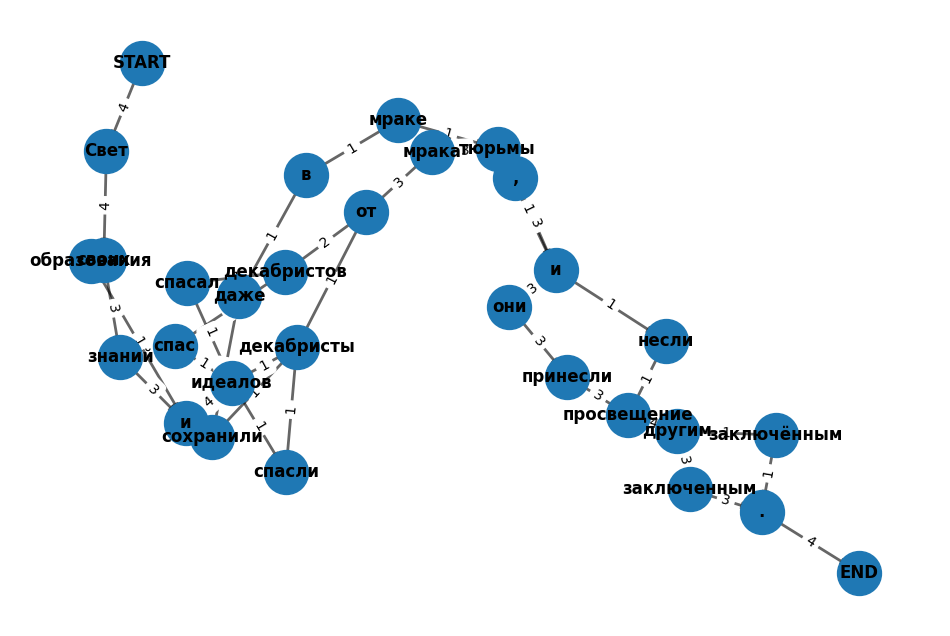

In [16]:
graph = build_graph(sentences)
draw_graph(graph)

In [21]:
def greedy(G):
    result = []
    current_node = "START"

    while True:
        neighbors = list(G.successors(current_node))
        if not neighbors:
            break

        max_weight = -1
        best_next = None

        for neighbor in neighbors:
            edge_weight = G.edges[current_node, neighbor]['weight']
            node_weight = G.nodes[neighbor]['weight']
            total_weight = edge_weight + node_weight

            if total_weight > max_weight:
                max_weight = total_weight
                best_next = neighbor

        if G.nodes[best_next]['word'] == "END":
            break

        result.append(G.nodes[best_next]['word'])
        current_node = best_next

    return ' '.join(result).replace(' .', '.').replace(' ,', ',')

In [23]:
greedy(graph)

'Свет своих знаний и идеалов декабристы сохранили даже в мраке тюрьмы, и они принесли просвещение другим заключенным.'

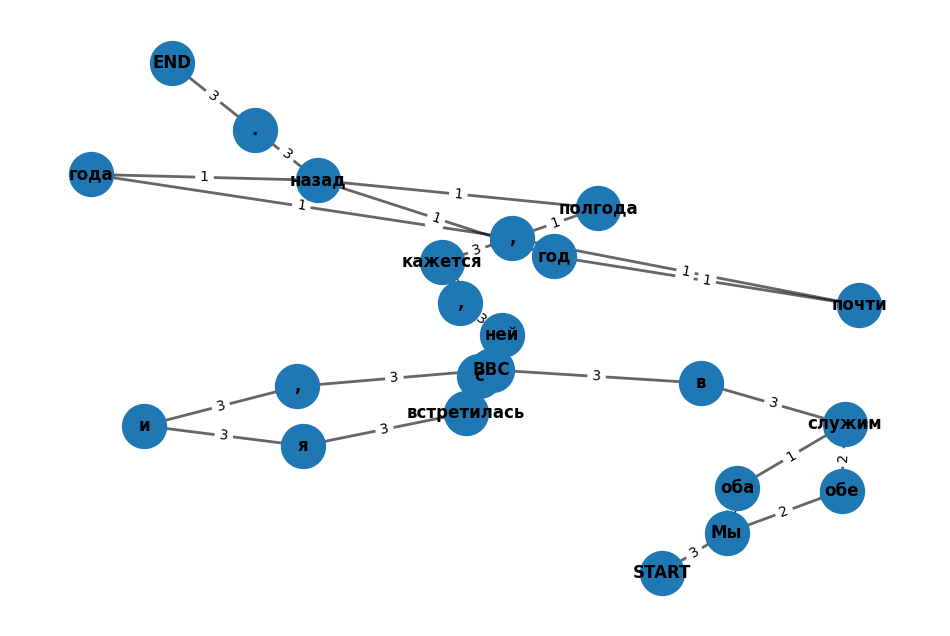

In [27]:
sentences = ['Мы обе служим в ВВС, и я встретилась с ней, кажется, почти год назад.',
             'Мы оба служим в ВВС, и я встретилась с ней, кажется, полгода назад.',
             'Мы обе служим в ВВС, и я встретилась с ней, кажется, года назад.'
]
graph = build_graph(sentences)
draw_graph(graph)